# Homework 7: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [69]:
library(dplyr)
setwd("/Users/asalyunusova/Documents/Data_Science/Homework/lexDat") #load lexical data
lexDat <- read.csv("LexicalData_withIncorrect.csv")
setwd("/Users/asalyunusova/Documents/Data_Science/Homework/lexDat") #load items data
itemsdat <- read.csv("Items.csv")

items <- itemsdat%>%dplyr::select(Word, Length, Log_Freq_HAL)
finaldata <- left_join(lexDat, items, by=c("D_Word"="Word"))
finaldata <- drop_na(finaldata)
head(dat)

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,8,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

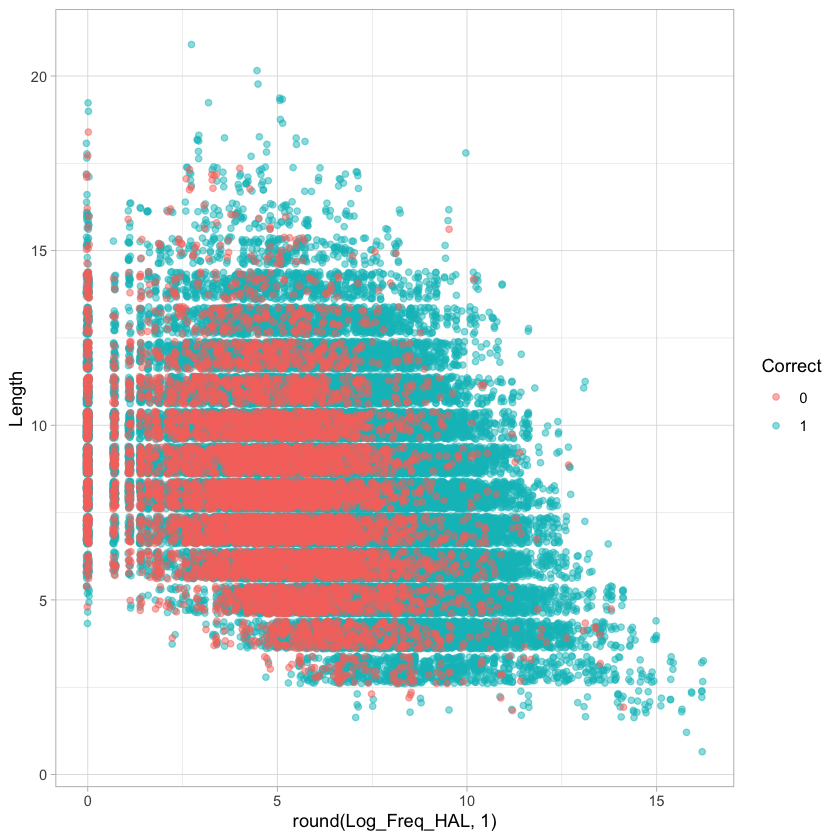

In [70]:
require(tidyverse) # Load the tidyverse package, if you haven't yet
finaldata$Correct <- as.factor(finaldata$Correct) # so that R knows that Correct is categorical, not numeric. 

# plot the Correct / Incorrect clusters
ggplot(finaldata,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light() 


What do you observe about the "Correct" and "Incorrect" clusters? 

> *Looking at the y-axis, the correct clusters appear to have lower levels of length (words that are shorter are more likely to have a correct response) while the incorrect clusters are trending towards increased word length. Looking at the x-axis, the incorrect clusters are trending towards grater levels of Log_Freq_HAL, meaning that words that are more common are more likely to have an incorrect response. While the correct cluster is clustered more towards lower levels of Log_Freq_HAL, meaning that words that are less common are more likely to have a correct response* 
> 

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [71]:
glm.fit0=glm(Correct~Length+Log_Freq_HAL+Length:Log_Freq_HAL, data=finaldata, family=binomial)

summary(glm.fit0)


Call:
glm(formula = Correct ~ Length + Log_Freq_HAL + Length:Log_Freq_HAL, 
    family = binomial, data = finaldata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


Call:
glm(formula = Correct ~ Length + Log_Freq_HAL + Length:Log_Freq_HAL, 
    family = binomial, data = finaldata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***

Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5

What can you conclude from this output? (a brief gist is fine)

> *Length and Log_Freq_Hal signficantly predict whether the response will be correct. There is also a signficant interaction between the two variables on the outcome of correct response.* 
> 

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [72]:
threshold = 0.5
y_hat <- data.frame(predict(glm.fit0, type = "response"))
y_hat <- data.frame(y_hat[,1])
colnames(y_hat) <- "predicted_value"

y_hat$predicted_hat <- ifelse(y_hat$predicted_value > threshold, 1,0)

confusion_df = data.frame(y_hat$predicted_hat, finaldata$Correct)
colnames(confusion_df) = c('predicted', 'actual')
table (confusion_df)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] "Accuracy: 0.886526229299183"


         actual
predicted     0     1
        0    13    44
        1  7966 62566
[1] "Accuracy: 0.886526229299183"

Did the model do well at predicting lexical decision correctness? Why or why not? 

> *When looking at the overall test accuracy, the model is doing well at predicting lexical decision correctness at 88.65%, or in other words it makes an incorrect prediction 11.35% of the time.*  
> 

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [73]:
library(MASS)
qda.fit = qda(Correct~Length+Log_Freq_HAL+Length:Log_Freq_HAL, data=finaldata)
qda.pred = predict(qda.fit, finaldata)
summary(qda.pred)

          Length Class  Mode   
class      70589 factor numeric
posterior 141178 -none- numeric

          Length Class  Mode   
class      70589 factor numeric
posterior 141178 -none- numeric

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [86]:
qda_prob_df = data.frame(predict(qda.fit, finaldata))$class


confusion_df = data.frame(qda_prob_df, finaldata$Correct)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted     0     1
        0   455  1647
        1  7524 60963

[1] "Accuracy: 0.870078907478502"


         actual
predicted     0     1
        0   455  1647
        1  7524 60963
[1] "Accuracy: 0.870078907478502"

How does QDA prediction performance differ from that of logistic regression?

> *The QDA prediction performance does a slightly worse job, with a testing accuracy of 87.01% compared to the logistic model prediction. * 
> 

**DUE:** 5pm EST, March 25, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Jenah Black, Julia Conti, Emefa Akwayena*